In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
import seaborn as sns
from matplotlib.colors import ListedColormap
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
from torchmetrics import Accuracy
from torch import optim
from d2l import torch as d2l
#Suppress all warnings because they annoy me
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [9]:
def build_leNet(num_classes):
    model = nn.Sequential(
        nn.LazyConv2d(6,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.LazyConv2d(6,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Flatten(),
        nn.LazyLinear(120),
        nn.ReLU(),
        nn.LazyLinear(84),
        nn.ReLU(),
        nn.LazyLinear(num_classes)
    )
    return model


In [7]:
torch.cuda.is_available()

False

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,),)])

batch_size = 16

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

leNet = build_leNet(10)
leNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(leNet.parameters(), lr=0.001)
optimizer.zero_grad()
train_loss_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_acc = 0.0
    for images, labels in trainloader:
        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    train_loss = train_loss/len(trainloader)
    train_loss_history.append(train_loss)
    for images, labels in valloader:
        # get the inputs; data is a list of [inputs, labels]

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)

        # print statistics
        val_loss += loss.item()
        acc = Accuracy('multiclass',num_classes=10) 
        val_acc += acc(outputs,labels)
    val_loss = val_loss/len(valloader)
    val_loss_history.append(val_loss)
    val_acc = val_acc/len(valloader)
    val_acc_history.append(val_acc)
    print(f' epoch[{epoch + 1}] losses train: {train_loss} val: {val_loss} val acc: {val_acc}')


 epoch[1] losses train: 2.300716169420878 val: 2.2957792728424073 val acc: 0.17170000076293945
 epoch[2] losses train: 2.2776810028711956 val: 2.2250509895324706 val acc: 0.3815000057220459
 epoch[3] losses train: 1.5389614900112152 val: 0.9411279531955719 val acc: 0.6640999913215637
 epoch[4] losses train: 0.779950852104028 val: 0.689924705028534 val acc: 0.7433000206947327
 epoch[5] losses train: 0.6399773628731569 val: 0.6228153048992157 val acc: 0.7671999931335449
 epoch[6] losses train: 0.5790083525776863 val: 0.6187152002930641 val acc: 0.777899980545044
 epoch[7] losses train: 0.5400490835785866 val: 0.5491303231835365 val acc: 0.7958999872207642
 epoch[8] losses train: 0.5100847815573215 val: 0.5068630236268044 val acc: 0.8170999884605408
 epoch[9] losses train: 0.48518522674341996 val: 0.49089798735380175 val acc: 0.8203999996185303
 epoch[10] losses train: 0.4656152165710926 val: 0.47673947312831877 val acc: 0.8278999924659729


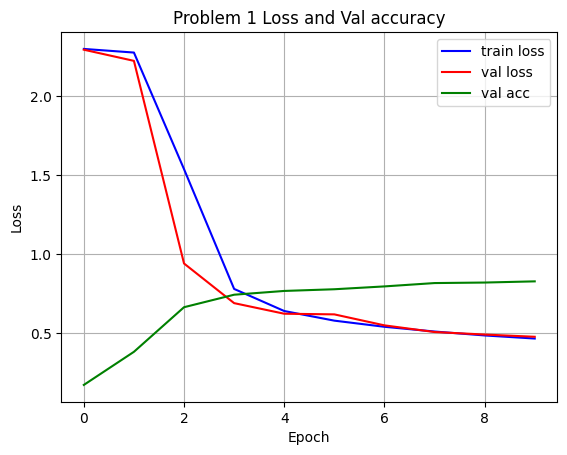

In [21]:
plt.plot(range(0, 10), train_loss_history, color='blue') 
plt.plot(range(0, 10), val_loss_history, color='red') 
plt.plot(range(0, 10), val_acc_history, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Problem 1 Loss and Val accuracy') 
plt.legend(['train loss','val loss','val acc'])

In [ ]:
## Training loss, validation loss and validation accuracy all seem to be much improved from the original model

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [24]:
def build_leNetMK2(num_classes):
    model = nn.Sequential(
        nn.LazyConv2d(10,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.LazyConv2d(10,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Flatten(),
        nn.LazyLinear(128),
        nn.ReLU(),
        nn.LazyLinear(256),
        nn.ReLU(),
        nn.LazyLinear(num_classes)
    )
    return model

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,),)])

batch_size = 16

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

leNet = build_leNetMK2(10)
leNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(leNet.parameters(), lr=0.001)
optimizer.zero_grad()
train_loss_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_acc = 0.0
    for images, labels in trainloader:
        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    train_loss = train_loss/len(trainloader)
    train_loss_history.append(train_loss)
    for images, labels in valloader:
        # get the inputs; data is a list of [inputs, labels]

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)

        # print statistics
        val_loss += loss.item()
        acc = Accuracy('multiclass',num_classes=10) 
        val_acc += acc(outputs,labels)
    val_loss = val_loss/len(valloader)
    val_loss_history.append(val_loss)
    val_acc = val_acc/len(valloader)
    val_acc_history.append(val_acc)
    print(f' epoch[{epoch + 1}] losses train: {train_loss} val: {val_loss} val acc: {val_acc}')

 epoch[1] losses train: 2.1053017955303193 val: 1.2024053215026855 val acc: 0.5929999947547913
 epoch[2] losses train: 0.7952415201266607 val: 0.7001184326410294 val acc: 0.7218999862670898
 epoch[3] losses train: 0.6218626962572337 val: 0.6140570963621139 val acc: 0.7700999975204468
 epoch[4] losses train: 0.5588733093400796 val: 0.5518714827418327 val acc: 0.7921000123023987
 epoch[5] losses train: 0.5157263241529465 val: 0.5086466083049774 val acc: 0.8144000172615051
 epoch[6] losses train: 0.48457798756758375 val: 0.49549979194402693 val acc: 0.8216999769210815
 epoch[7] losses train: 0.45842366338173546 val: 0.45742327781915665 val acc: 0.8335999846458435
 epoch[8] losses train: 0.4382387173016866 val: 0.4389357023835182 val acc: 0.8424000144004822
 epoch[9] losses train: 0.4209801403810581 val: 0.4328428842127323 val acc: 0.8416000008583069
 epoch[10] losses train: 0.4062036319330335 val: 0.411463677406311 val acc: 0.8537999987602234


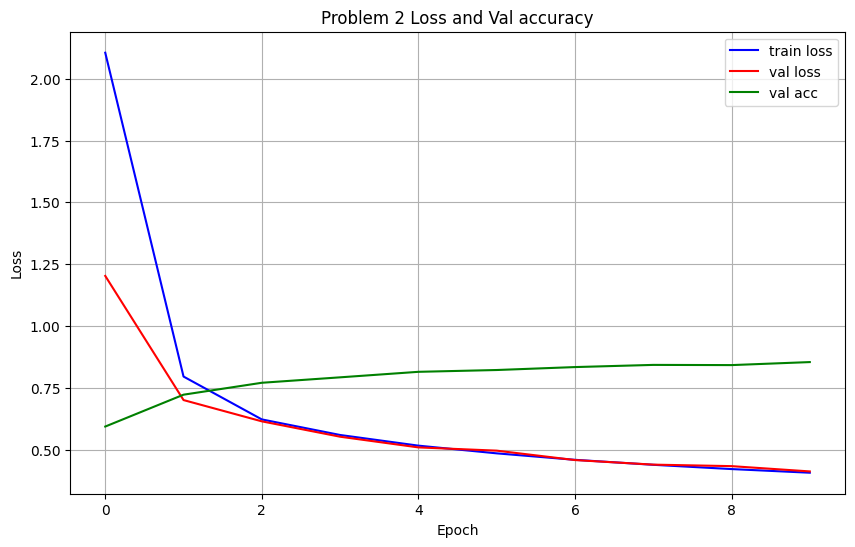

In [27]:
plt.plot(range(0, 10), train_loss_history, color='blue') 
plt.plot(range(0, 10), val_loss_history, color='red') 
plt.plot(range(0, 10), val_acc_history, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Problem 2 Loss and Val accuracy') 
plt.legend(['train loss','val loss','val acc'])

In [ ]:
## Adding a few more neurons to the lazy linear layers on the bottom and most importantly keeping learning rate low
## at 0.001 we were able to acheive losses well under 0.5 and a validation acccuracy of over 85 percent, which is 
## pretty good for such small images

In [ ]:
##_________________________________________##
## Problem 3
##_________________________________________##

In [29]:
def build_leNetMK3(num_classes):
    model = nn.Sequential(
        nn.LazyConv2d(10,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.LazyConv2d(10,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Flatten(),
        nn.LazyLinear(128),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.LazyLinear(256),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.LazyLinear(num_classes)
    )
    return model

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,),)])

batch_size = 16

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

leNet = build_leNetMK3(10)
leNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(leNet.parameters(), lr=0.001)
optimizer.zero_grad()
train_loss_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_acc = 0.0
    for images, labels in trainloader:
        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    train_loss = train_loss/len(trainloader)
    train_loss_history.append(train_loss)
    for images, labels in valloader:
        # get the inputs; data is a list of [inputs, labels]

        # forward + backward + optimize
        outputs = leNet(images)
        loss = criterion(outputs, labels)

        # print statistics
        val_loss += loss.item()
        acc = Accuracy('multiclass',num_classes=10) 
        val_acc += acc(outputs,labels)
    val_loss = val_loss/len(valloader)
    val_loss_history.append(val_loss)
    val_acc = val_acc/len(valloader)
    val_acc_history.append(val_acc)
    print(f' epoch[{epoch + 1}] losses train: {train_loss} val: {val_loss} val acc: {val_acc}')

 epoch[1] losses train: 1.986356315024694 val: 1.0761363611221313 val acc: 0.5928999781608582
 epoch[2] losses train: 0.8381250591635704 val: 0.7527868667602539 val acc: 0.7164999842643738
 epoch[3] losses train: 0.7048546671013037 val: 0.681090744304657 val acc: 0.7391999959945679
 epoch[4] losses train: 0.6472778519034386 val: 0.6530112414360046 val acc: 0.7527999877929688
 epoch[5] losses train: 0.6061133761326472 val: 0.6121069473028183 val acc: 0.7706000208854675
 epoch[6] losses train: 0.5727882662167152 val: 0.5771763667821884 val acc: 0.781000018119812
 epoch[7] losses train: 0.544729968559742 val: 0.545372519659996 val acc: 0.7986000180244446
 epoch[8] losses train: 0.5199190206785996 val: 0.5295298095107078 val acc: 0.8027999997138977
 epoch[9] losses train: 0.4981980183641116 val: 0.514162456882 val acc: 0.8126000165939331
 epoch[10] losses train: 0.4800027753174305 val: 0.49249726749658584 val acc: 0.8162999749183655


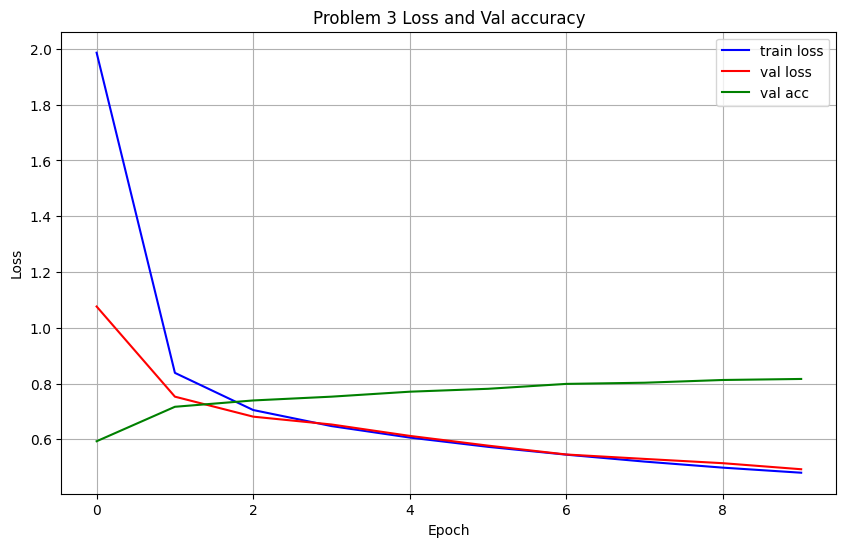

In [31]:
plt.plot(range(0, 10), train_loss_history, color='blue') 
plt.plot(range(0, 10), val_loss_history, color='red') 
plt.plot(range(0, 10), val_acc_history, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Problem 3 Loss and Val accuracy') 
plt.legend(['train loss','val loss','val acc'])

In [ ]:
## Adding dropout layers only seems to have made it significantly worse, losing about 4% validation accuracy

In [ ]:
##_________________________________________##
## Problem 4
##_________________________________________##

In [39]:
def build_strippedAlexNet(num_classes):
    model = nn.Sequential(
        nn.LazyConv2d(96, kernel_size=3, stride=4, padding=1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(128, kernel_size=3, padding=2), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
        nn.LazyLinear(512), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )
    return model

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,),)])

batch_size = 16

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

alexNet = build_strippedAlexNet(10)
alexNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexNet.parameters(), lr=0.001)
optimizer.zero_grad()
train_loss_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_acc = 0.0
    for images, labels in trainloader:
        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = alexNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    train_loss = train_loss/len(trainloader)
    train_loss_history.append(train_loss)
    for images, labels in valloader:
        # get the inputs; data is a list of [inputs, labels]

        # forward + backward + optimize
        outputs = alexNet(images)
        loss = criterion(outputs, labels)

        # print statistics
        val_loss += loss.item()
        acc = Accuracy('multiclass',num_classes=10) 
        val_acc += acc(outputs,labels)
    val_loss = val_loss/len(valloader)
    val_loss_history.append(val_loss)
    val_acc = val_acc/len(valloader)
    val_acc_history.append(val_acc)
    print(f' epoch[{epoch + 1}] losses train: {train_loss} val: {val_loss} val acc: {val_acc}')

 epoch[1] losses train: 2.301731559562683 val: 2.300677629852295 val acc: 0.10019999742507935
 epoch[2] losses train: 2.299402804819743 val: 2.2977810188293457 val acc: 0.250900000333786
 epoch[3] losses train: 2.2945329935709635 val: 2.2897210746765135 val acc: 0.33719998598098755
 epoch[4] losses train: 2.2758188414891563 val: 2.2489077167510985 val acc: 0.2409999966621399
 epoch[5] losses train: 2.0737570949236552 val: 1.6169792833328247 val acc: 0.44350001215934753
 epoch[6] losses train: 1.2029809991995493 val: 1.0805718375205993 val acc: 0.5561000108718872
 epoch[7] losses train: 0.9703675439596177 val: 0.9083902541160583 val acc: 0.6545000076293945
 epoch[8] losses train: 0.8625088486591975 val: 0.8080631171703339 val acc: 0.6992999911308289
 epoch[9] losses train: 0.7939274462501208 val: 0.7603195834636688 val acc: 0.7178000211715698
 epoch[10] losses train: 0.7412460904280345 val: 0.7124560468673706 val acc: 0.7376000285148621


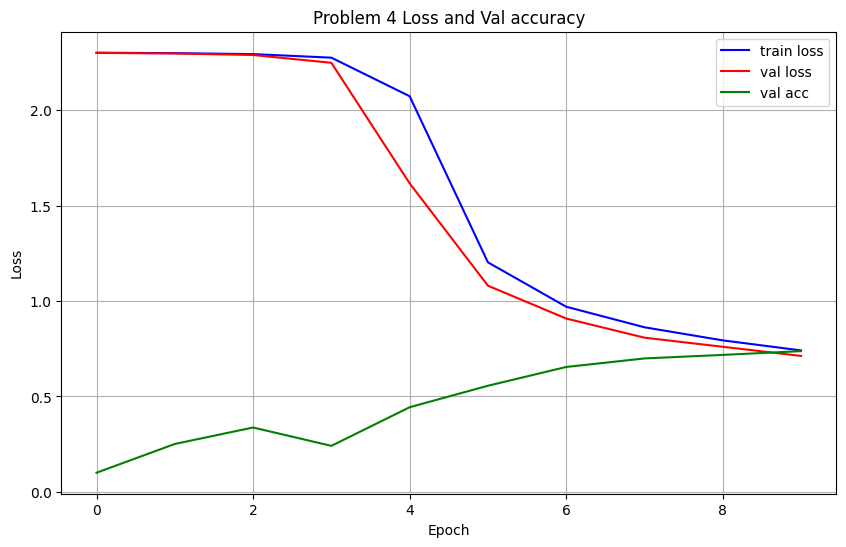

In [41]:
plt.plot(range(0, 10), train_loss_history, color='blue') 
plt.plot(range(0, 10), val_loss_history, color='red') 
plt.plot(range(0, 10), val_acc_history, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Problem 4 Loss and Val accuracy') 
plt.legend(['train loss','val loss','val acc'])

In [ ]:
## Even heavily stripped down, AlexNet is far too complicated for what the fashion dataset needs.
## Its training time in particular is absolutely egregious, taking about double the time the leNet needed,
## yet acheiving nowhere near as much accuracy